<a href="https://colab.research.google.com/github/Juseong-Yu/hongonmachine/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-최근접 이웃


In [ ]:
#도미 데이터(길이와 무게)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

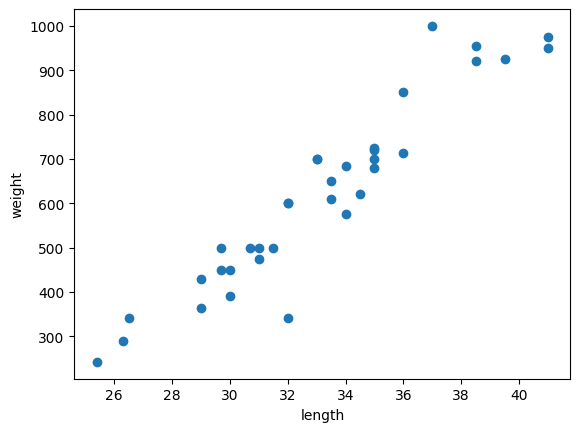

In [ ]:
# 도미의 길이와 무게에 따른 산점도
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight) # 순서대로 x, y축
plt.xlabel('length') # x 축에 길이
plt.ylabel('weight') # y 축에 무게
plt.show()

In [ ]:
# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

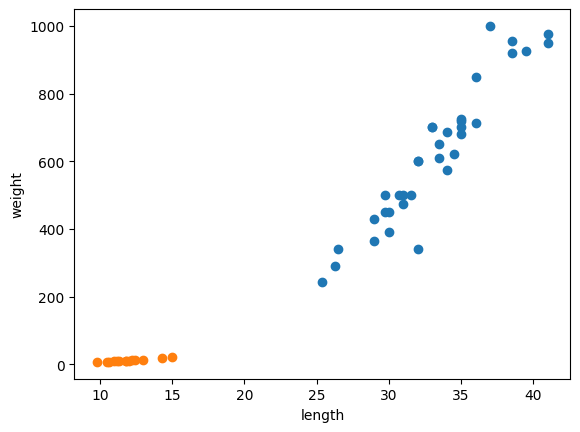

In [ ]:
# 도미와 빙어 데이터 산점도 동시에 표현
plt.scatter(bream_length, bream_weight) # 도미
plt.scatter(smelt_length, smelt_weight) # 빙어
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 도미와 빙어의 길이와 무게를 합쳐서 하나의 리스트로 만듦
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [ ]:
# 사이킷런을 위해 2차원 리스트로 한 리스트에 legth한개 weigth 한 개 나오도록 변경 (리스트 내포)
fish_data = [[l, w] for l, w in zip(length, weight)]

In [ ]:
# 지도 학습을 위해 데이터의 정답을 준다
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# k-최근접이웃 알고리즘을 받아 생선 데이터에 적용하고 확인해보기, 기본적으로 k를 5로 둔다
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

In [ ]:
# 길이가 30이고 무게가 600인 생선은 도미라고 예측한다
kn.predict([[30, 600]])

array([1])

In [ ]:
# k를 49로 두면 전체 샘플중에 가장 많은 데이터인 도미로 모든 데이터를 예측하기 때문에 문제다
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

# 훈련 세트와 테스트 세트

In [ ]:
# 물고기 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

In [ ]:
# 데이터를 훈련 세트 35개와 테스트 세트 14개로 구분
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [ ]:
# 훈련 세트를 k-최근접 이웃으로 훈련해서 테스트 세트로 체크함
# 훈련 세트에는 도미 데이터만 있고, 테스트 세트에는 빙어 데이터만 존재하기 때문에 테스트 결과가 0이 나옴
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

In [ ]:
# 파이썬 배열을 numpy 배열로 바꾸어줌
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)
print(input_arr.shape)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)


In [ ]:
# 데이터를 섞기 위해 새로운 리스트에 인덱스값을 섞고 이를 이용해 데이터를 분할
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

print(index)

# 넘파이의 배열 슬라이싱을 이용
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


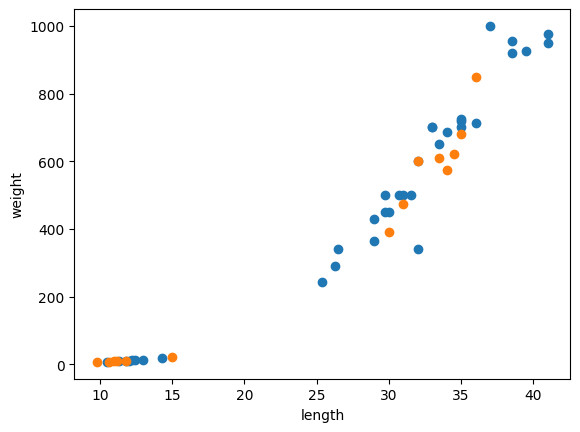

In [ ]:
# 산점도를 이용해 확인하면 훈련 세트와 테스트 세트가 랜덤하게 잘 분배 됨
import matplotlib.pyplot as plt

# 2차원 배열을 인덱싱 할 때 [행, 열]이다.
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length') # x 축에 길이
plt.ylabel('weight') # y 축에 무게
plt.show()

In [ ]:
# k-최근접 이웃 알고리즘이 잘 작동하는 것을 알 수 있다.
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

# 데이터 전처리


In [ ]:
# 물고기 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np

# 데이터를 numpy 배열로 빠르게 만듦
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
# 넘파이 함수를 이용해 1과 0이 채워진 리스트를 만든 후, concatenate로 합친다.
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [ ]:
# 훈련 세트와 테스트 세트를 분리하는 사이킷런을 이용해 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state=42)

In [ ]:
# k-최근접 이웃 알고리즘을 이용해 모델 적합도 확인
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
# 실제로는 도미인 데이터를 확인해 보니 빙어로 나오네??
print(kn.predict([[25,150]]))

[0.]


In [ ]:
distances, indexs = kn.kneighbors([[25,150]])

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

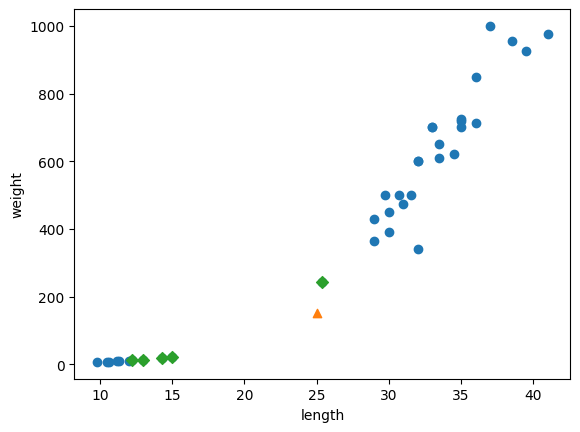

In [ ]:
import matplotlib.pyplot as plt

# 이상한 도미값과 가장 가까운 5개를 확인하기 위한 산점도
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexs,0], train_input[indexs,1], marker='D')
plt.xlabel('length') # x 축에 길이
plt.ylabel('weight') # y 축에 무게
plt.show()

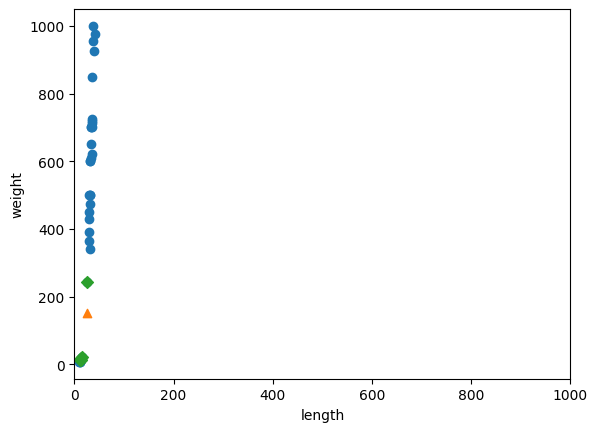

In [ ]:
# x 축과 y축의 눈금을 동일하게 두어 실제로 거리를 확인
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexs,0], train_input[indexs,1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length') # x 축에 길이
plt.ylabel('weight') # y 축에 무게
plt.show()

In [ ]:
# 표준점수를 구하기((특성 - 평균) / 표준편차)
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)
print(mean, std)

train_scaled = (train_input - mean) / std
print(train_scaled[:5])

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]
[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]]


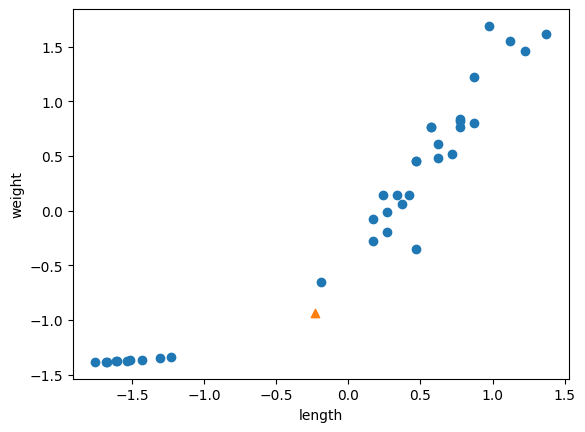

In [ ]:
# 표준점수를 이용한 산점도
new = ([25,150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length') # x 축에 길이
plt.ylabel('weight') # y 축에 무게
plt.show()

In [ ]:
# 평균점수로 만든 리스트를 k-최근접 이웃 알고리즘으로 훈련후 평가
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

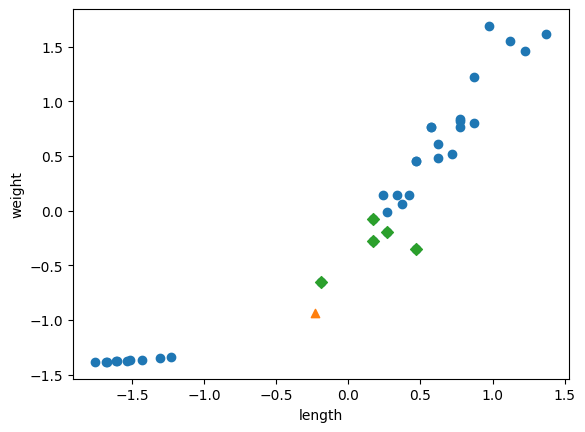

In [ ]:
# 이상한 도미값과 가장 가까운 5개를 확인하기 위한 산점도(평균점수)
distances, indexs = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexs,0], train_scaled[indexs,1], marker='D')
plt.xlabel('length') # x 축에 길이
plt.ylabel('weight') # y 축에 무게
plt.show()


# k-최근접 이웃 회귀


In [ ]:
import numpy as np

# 농어 데이터 준비 (길이, 무게)
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

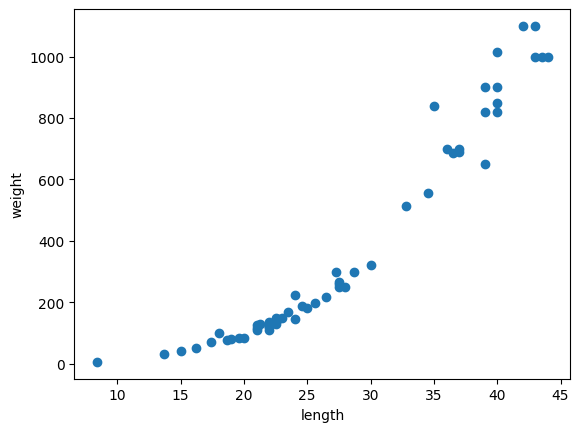

In [ ]:
import matplotlib.pyplot as plt

# 농어 데이터의 산점도
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# 농어 데이터를 훈련 세트와 테스트 세트로 구분
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [ ]:
# 입력 값을 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# k-최근접 이웃 회귀 모델을 생성
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

# 테스트 세트를 이용해 점수확인
print(knr.score(test_input, test_target))

0.992809406101064


In [ ]:
from sklearn.metrics import mean_absolute_error

# 평균 오차값 구하기
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [ ]:
# 적합정도를 조절하기 위해 결정계수 점수 확인
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099254
0.992809406101064


In [ ]:
# 조금더 적합성을 높이기 위해 이웃의 개수 조정
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


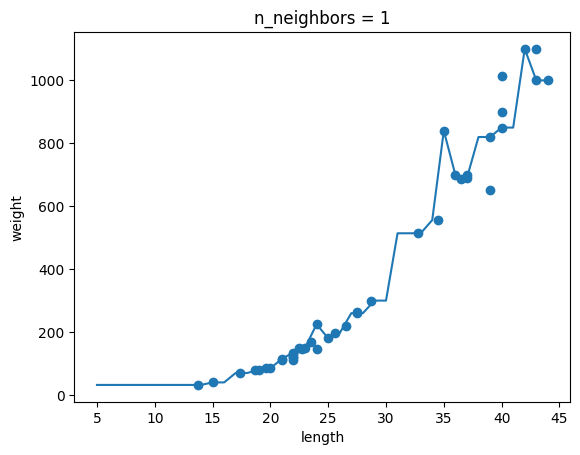

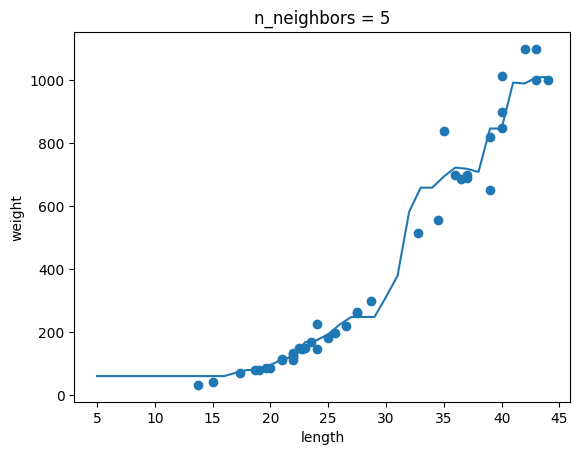

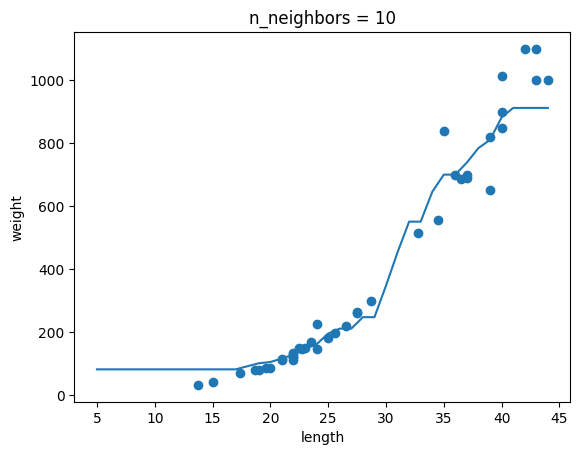

In [ ]:
# 문제 2번 출력
from sklearn.neighbors import KNeighborsRegressor

# k-최근접 이웃 회귀 모델 만들고, x 좌표를 5부터 45까지 제작
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)

# 1, 5, 10으로 n값을 바꿔가며 그래프의 변화를 확인한다.
for n in [1, 5, 10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)

  plt.scatter(train_input, train_target) # 점
  plt.plot(x, prediction) # 선
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()


# 선형 회귀


In [ ]:
import numpy as np

# 농어 데이터 준비 (길이, 무게)
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split

# 농어 데이터를 훈련 세트와 테스트 세트로 구분
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [ ]:
# 입력 값을 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# k-최근접 이웃 회귀 모델을 생성
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# 길이가 50cm인 농어의 예측이 실재와 너무 다름
print(knr.predict([[50]]))

[1033.33333333]


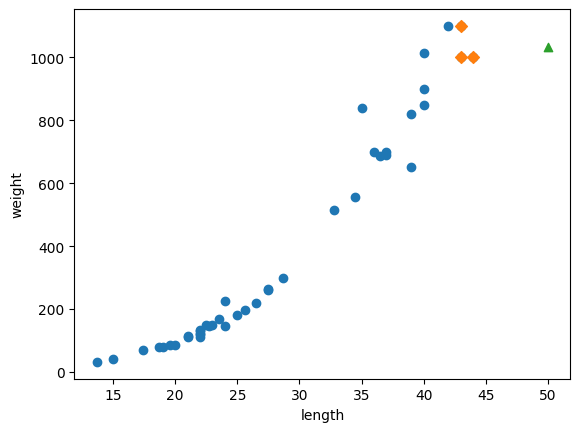

In [ ]:
import matplotlib.pyplot as plt

# 농어의 훈련 세트와 50cm 농어 예측을 산점도로 표현
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker="D")
plt.scatter(50, knr.predict([[50]]), marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 길이가 50이든 100이든 k-최근접 이웃 회귀에서는 같은 값이 나온다. -> 아무리 길이가 늘어도 표본이 부족하면 예측 불가이다.
print(np.mean(train_target[indexes]))
print(knr.predict([[100]]))

1033.3333333333333
[1033.33333333]


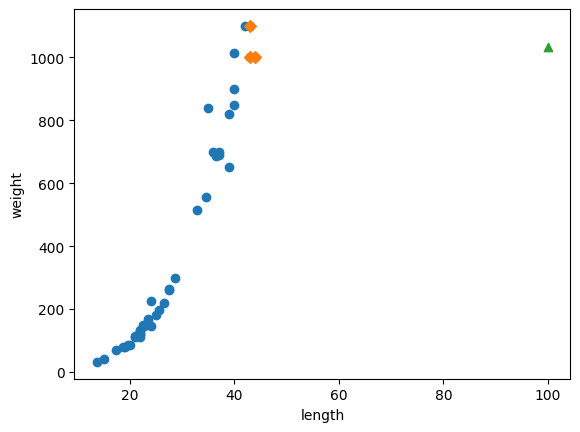

In [ ]:
# 농어의 훈련 세트와 100cm 농어 예측을 산점도로 표현
distances, indexes = knr.kneighbors([[100]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker="D")
plt.scatter(100, knr.predict([[100]]), marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 선형 회귀 모델
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [ ]:
# 선형 회귀 모델의 파라미터 (계수, y절편)
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


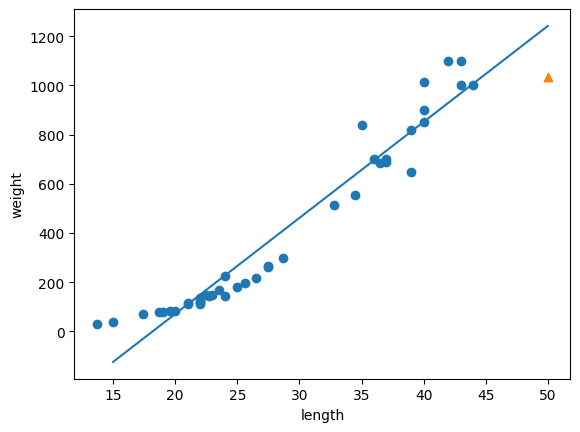

In [ ]:
# 선형 회귀 모델의 그래프
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

# 50cm 농어 산점도
plt.scatter(50, knr.predict([[50]]), marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 결정 계수로 모델의 적합도 확인 (문제가 좀 있음)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [ ]:
# 다항 회귀를 위해 길이의 제곱을 구함
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [ ]:
# 만든 배열의 구조 확인
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
# 다항 회귀 모델
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [ ]:
# 다항 회귀 모델의 파라미터 (계수, y절편)
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


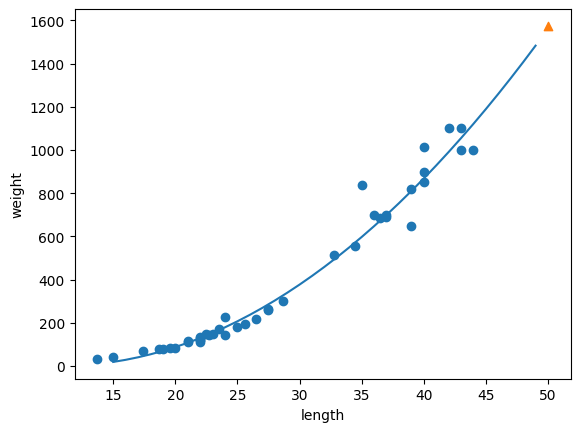

In [ ]:
# 다항 회귀의 그래프 그리기
point = np.arange(15,50)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 산점도
plt.scatter(50, 1574, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 결정 계수 값이 잘 나온다
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


# 특성 공학과 규제 (다중회귀)


In [ ]:
# 농어 데이터 불러오기
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full[1:5])

[[13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


In [ ]:
# 타깃 데이터 설정
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# 훈련 세트와 테스트 세트로 분할
from sklearn.model_selection import train_test_split

# 농어 데이터를 훈련 세트와 테스트 세트로 구분
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

In [ ]:
# 사이킷런의 변환기를 이용하여 특성 추가 생성
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape, test_poly.shape) # 특성이 3개에서 9개로 바뀌었다
poly.get_feature_names_out()

(42, 9) (14, 9)


array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
# 선형 회귀 모델 훈련
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594111


In [ ]:
# 특성 추가시에 5제곱항까지 추가해보기
poly = PolynomialFeatures(degree = 5,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape, test_poly.shape) # 특성이 3개에서 55개로 바뀌었다

(42, 55) (14, 55)


In [ ]:
# 선형회귀모델 훈련후 점수 확인
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) # 문제 있음

0.9999999999996433
-144.40579436844948


In [ ]:
# StandardScaler 를 이용해 값을 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
# 릿지를 이용해 회귀 모델 규제
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


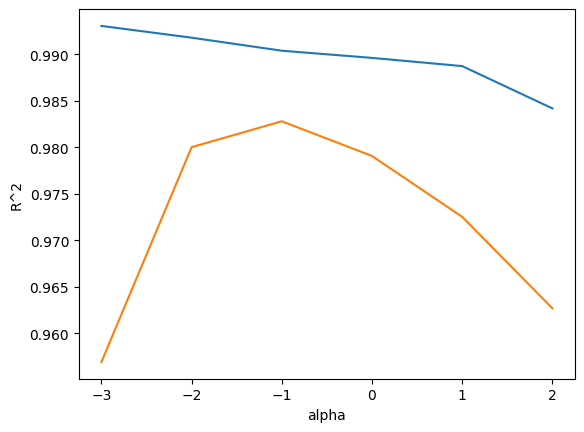

In [ ]:
# 릿지를 잘하기 위해 alpha 값을 변환해가며 최적의 값 구하기
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
# alpha를 최적의 값인 0.1에 설정하고 결정계수 확인
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [ ]:
# 라소를 이용해 회귀 모델 규제
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.183e

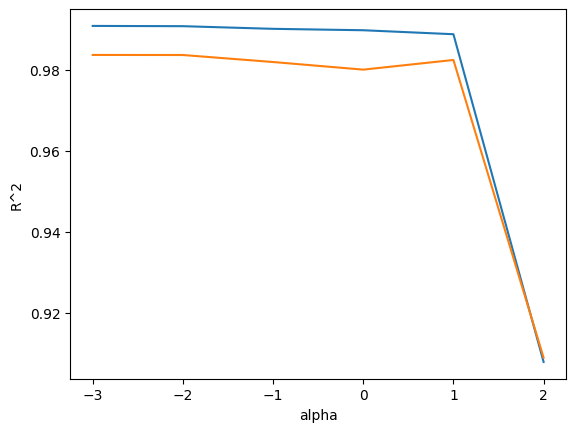

In [ ]:
# 라소를 잘하기 위해 alpha 값을 변환해가며 최적의 값 구하기
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
# alpha를 최적의 값인 0.1에 설정하고 결정계수 확인
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
# 라소로 인해 제외된 특성 갯수
print(np.sum(lasso.coef_ == 0))

40


# 로지스틱 회귀 (분류)

In [ ]:
# 생선 데이터 불러오기
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
# 인덱싱을 이용해 입력 데이터와 결과 데이터 나누기
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
# 훈련 세트와 테스트 세트로 구분
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# k-최근접 이웃을 이용해 생선 분류 모델을 만들어서 예측값을 알아보기
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.classes_)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))
print(kn.predict(test_scaled[:5]))

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
0.8907563025210085
0.85
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


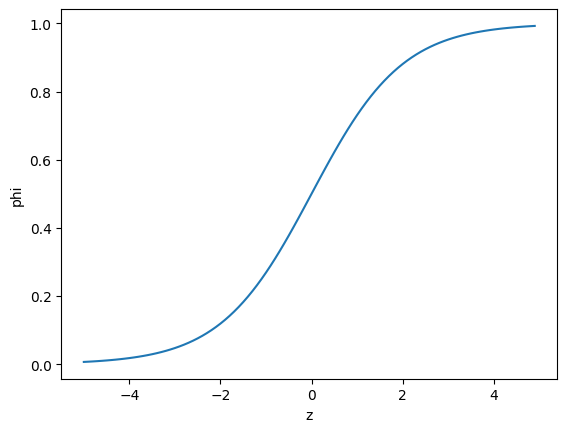

In [ ]:
# 시그모이드 함수 그래프 그리기
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
# 도미와 빙어 데이터만 추출
bream_smelt_indexes = (train_target == "Bream") | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
# 로지스틱 회귀(이진분류)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
# 가중치와 절편을 확인
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
# z함수 확인
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
# 시그모이드 함수 확인
from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [ ]:
# 로지스틱 회귀(다중 분류)
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

0.9327731092436975
0.925
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
# 가중치와 절편을 확인 (z 값이 결과의 종류만큼 나옴(이진분류를 여러번 하는 것과 같은 것임)
print(lr.coef_, lr.intercept_)

[[-1.49001259 -1.02909653  2.59342992  7.70358183 -1.20070797]
 [ 0.19618191 -2.01072007 -3.77974344  6.50492519 -1.99481478]
 [ 3.562807    6.34355461 -8.48969786 -5.75757213  3.79306162]
 [-0.10458363  3.60320663  3.93067948 -3.61740078 -1.7506979 ]
 [-1.40060998 -6.0750259   5.25969918 -0.87219289  1.86043812]
 [-1.38528461  1.49213609  1.39225441 -5.67734711 -4.40097409]
 [ 0.6215019  -2.32405484 -0.9066217   1.71600589  3.69369499]] [-0.09204689 -0.26289902  3.25100925 -0.14740759  2.65498221 -6.78787045
  1.38423249]


In [ ]:
# z함수 확인
decisions = lr.decision_function(test_scaled[:5])
print(np.round(decisions, decimals = 3))

[[ -6.498   1.032   5.164  -2.729   3.339   0.327  -0.634]
 [-10.859   1.927   4.771  -2.398   2.978   7.841  -4.26 ]
 [ -4.335  -6.233   3.174   6.487   2.358   2.421  -3.872]
 [ -0.683   0.453   2.647  -1.187   3.265  -5.753   1.259]
 [ -6.397  -1.993   5.816  -0.11    3.503  -0.112  -0.707]]


In [ ]:
# 소프트 맥스 함수를 이용해 확률을 구함
from scipy.special import softmax
proba = softmax(decisions, axis = 1)
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 확률적 강사 하강법


In [1]:
# 데이터 불러오고 전처리 하기
import pandas as pd
from sklearn.model_selection import train_test_split

fish = pd.read_csv('http://bit.ly/fish_csv_data')

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [2]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
# 확률적 경사 하강법과 로지스틱 손실함수를 이용한 모델
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target) # 에포크 10회
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

sc.partial_fit(train_scaled, train_target) # 에포크 1회
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775
0.8151260504201681
0.85


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


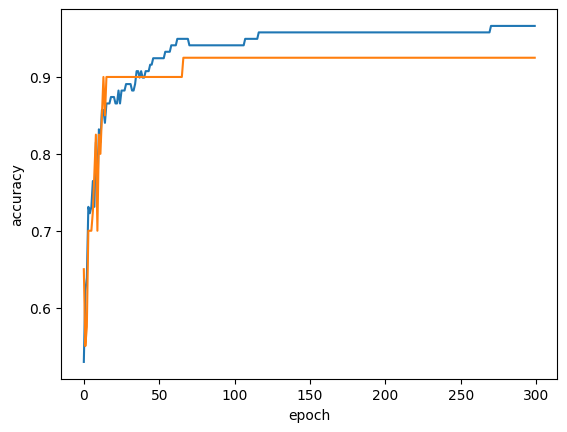

In [11]:
#에포크를 늘렸을때 점수를 구해서 적절한 에포크 찾기
import numpy as np
import matplotlib.pyplot as plt

sc = SGDClassifier(loss = 'log_loss', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [13]:
# 에포크가 100번 정도 일때가 적당함
sc = SGDClassifier(loss = 'log_loss', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [17]:
# 손실 함수를 힌지손실 함수를 이용
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
